Mounted at /content/drive
    FESESION;HORA;VERPREV;ENERGIA;FEULTMOD;CDUSUARIO
0  2021-01-01 00:00:00;1;0;0.0;2020-12-31 03:05:2...
1  2021-01-01 00:00:00;2;0;0.0;2020-12-31 03:05:2...
2  2021-01-01 00:00:00;3;0;0.0;2020-12-31 03:05:2...
3  2021-01-01 00:00:00;4;0;0.0;2020-12-31 03:05:2...
4  2021-01-01 00:00:00;5;0;0.0;2020-12-31 03:05:2...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25415 entries, 0 to 25414
Data columns (total 1 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   FESESION;HORA;VERPREV;ENERGIA;FEULTMOD;CDUSUARIO  25415 non-null  object
dtypes: object(1)
memory usage: 198.7+ KB
None
Tipos de Datos:
FESESION;HORA;VERPREV;ENERGIA;FEULTMOD;CDUSUARIO    object
dtype: object
FESESION     datetime64[ns]
HORA                  Int64
VERPREV               int64
ENERGIA             float64
FEULTMOD             object
CDUSUARIO            object
dtype: obj

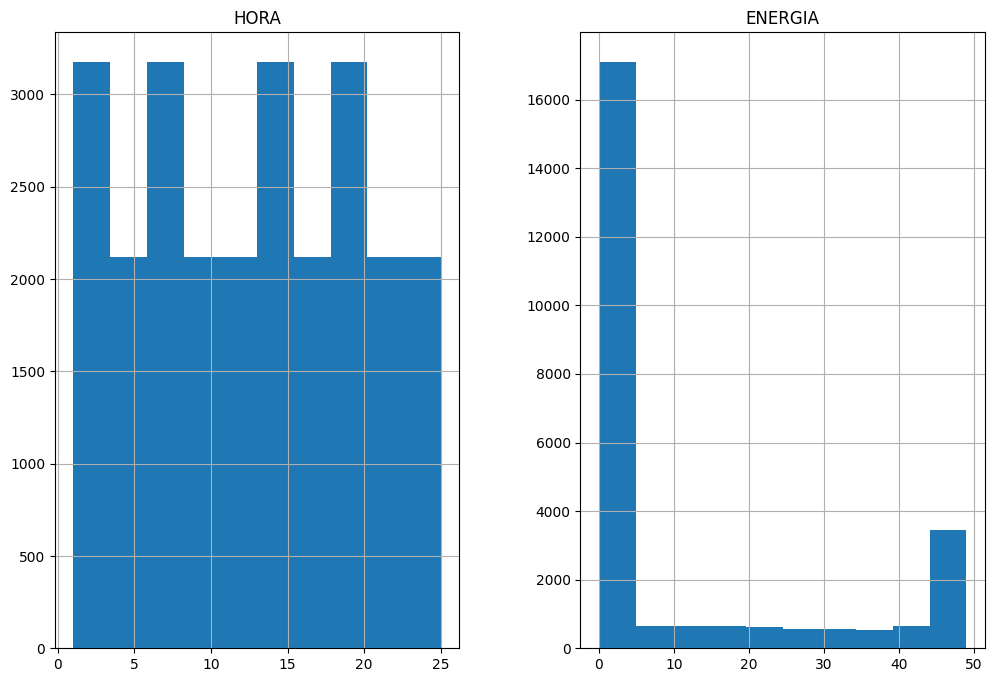

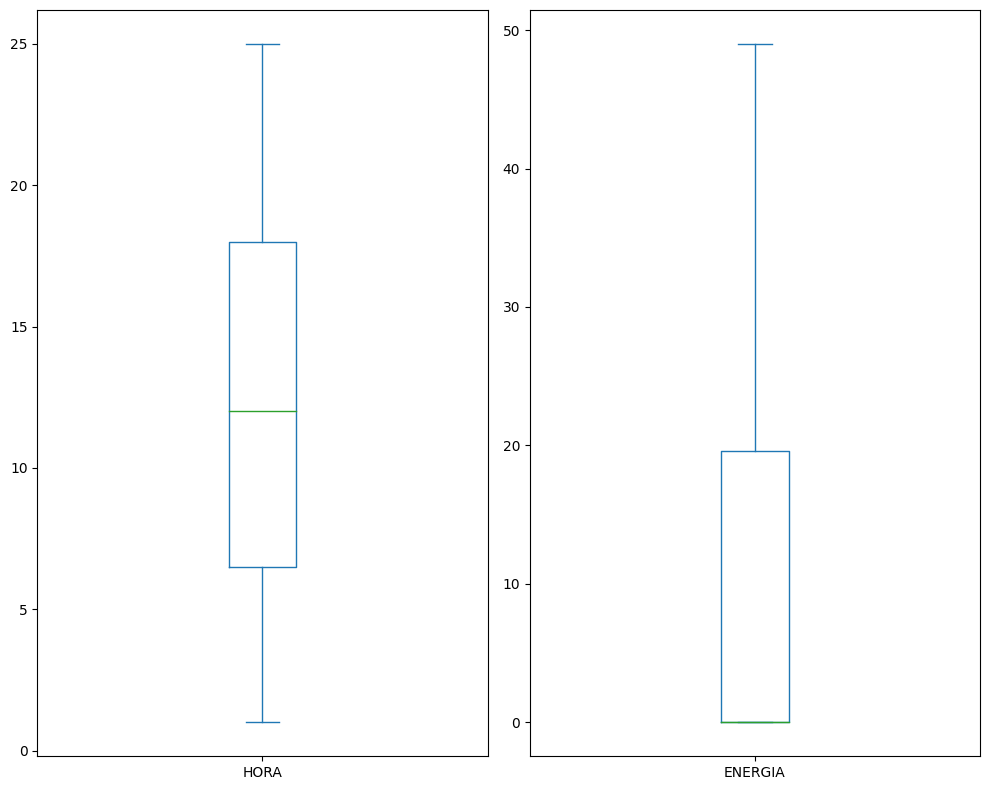

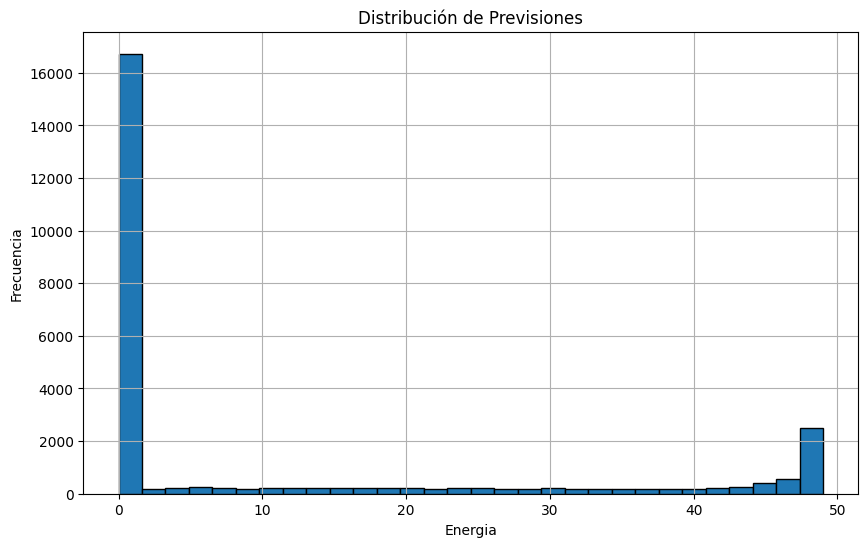

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
ruta_archivo = '/content/drive/My Drive/Colab Notebooks/PREVISIONES_BRUTO.csv'
df = pd.read_csv(ruta_archivo)

# Inspección
print(df.head())
print(df.info())

# Verificación de Datos
print("Tipos de Datos:")
print(df.dtypes)

# Conversión de Datos
df = pd.read_csv(ruta_archivo, delimiter=';')

# Conversión de tipos
df['HORA'] = pd.to_numeric(df['HORA'], errors='coerce').astype('Int64')
df['ENERGIA'] = pd.to_numeric(df['ENERGIA'], errors='coerce')
df['FESESION'] = pd.to_datetime(df['FESESION'], errors='coerce')


# Verificar los tipos de datos después de la conversión
print(df.dtypes)

# Eliminamos variables que no aportan
df = df.drop(['VERPREV', 'FEULTMOD', 'CDUSUARIO'], axis=1)
# Realizamos EDA


# Estadísticas Descriptivas
# Descripción de Datos Numéricos
print("Estadísticas Descriptivas (Datos Numéricos):")
print(df.describe(include=[np.number]))

# Descripción de Datos Categóricos
#print("Estadísticas Descriptivas (Datos Categóricos):")
#print(df.describe(include=['object']))

# Limpieza de Datos
df = df.dropna()

# Visualización de Datos
# Histogramas para Datos Numéricos
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.hist(figsize=(12, 8))
plt.show()

# solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])
n_cols = df_numeric.shape[1]
n_rows = n_cols // 2 if n_cols % 2 == 0 else (n_cols // 2) + 1

# Trazar el diagrama de cajas
df_numeric.plot(kind='box', subplots=True, layout=(n_rows, 2), figsize=(10, 8), sharex=False, sharey=False)

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.show()

# Historigrama
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
plt.hist(df['ENERGIA'], bins=30, edgecolor='black')  # Crear histograma
plt.title('Distribución de Previsiones')  # Añadir título
plt.xlabel('Energia')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.show()  # Mostrar el histograma
